In [1]:
%matplotlib notebook

import os

import warnings
import requests
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

warnings.filterwarnings('ignore')

# Get data
Only run it when you haven't downloaded the data

In [2]:
URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"

def fetch_data(fname='student.zip'):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'wb') as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data()

In [3]:
#unzip
with zipfile.ZipFile(DATA, 'r') as zip_ref:
    zip_ref.extractall()

# Data exploration
If you already have the data, starts here

In [2]:
#read files - math and language
math = pd.read_csv('student-mat.csv', ';')

lang = pd.read_csv('student-por.csv', ';')

In [5]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
lang.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
math.shape

(395, 33)

In [8]:
lang.shape

(649, 33)

In [9]:
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
lang.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [11]:
sns.distplot(math['age'], rug=True)

<IPython.core.display.Javascript object>

# Math performance data
Starts exploring math data

In [3]:
math.groupby('G3')['G3'].count().head()

G3
0    38
4     1
5     7
6    15
7     9
Name: G3, dtype: int64

In [5]:
#check null
math.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# One Hot Encoding
One hot encoding features


In [6]:
one_hot_encoding_columns = ['school', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
math = pd.get_dummies(data=math, columns=one_hot_encoding_columns)


In [7]:
math.head(3)

,age,address,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,U,4,4,2,2,0,yes,no,no,...,0,0,1,1,0,0,0,0,1,0
1,17,U,1,1,1,2,0,no,yes,no,...,1,0,0,1,0,0,0,1,0,0
2,15,U,1,1,1,2,3,yes,no,yes,...,1,0,0,0,0,1,0,0,1,0


# Binary features

In [8]:
#function to convert to 0 and 1
def convert_bool(row):
    row = row.replace('no', 0)
    row = row.replace('yes', 1)
    return row


In [9]:
#update rows and convert to bool
colname = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

#run fuction and convert to int
math[colname] = math[colname].apply(lambda col: convert_bool(col)).astype(int)

In [10]:
math.head(2)

,age,address,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,U,4,4,2,2,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,17,U,1,1,1,2,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0


# Category fetaures
Categories: famrel, freetime, goout, Dalc, Walc, health, traveltime, studytime, failures

In [11]:
math.groupby('G3')['G3'].count()

G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: G3, dtype: int64

In [12]:
#look why there are 0 on the target
filt = math['G3'] == 0
math[['G1', 'G2', 'G3']][filt].head()

,G1,G2,G3
128,7,4,0
130,12,0,0
131,8,0,0
134,9,0,0
135,11,0,0


# Number features
Numbers: age, absences, traveltime


In [13]:
math.columns

Index(['age', 'address', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'school_GP', 'school_MS',
       'sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

# Model

In [25]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.features import FeatureImportances


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [23]:
#adding G1 and G2, makes prediction so good. without it, they suck
X = math[['age', 'absences', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'traveltime', 'studytime', 'failures', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other','G1', 'G2']]
y = math['G3']


# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Ridge Regression

In [16]:
#using CV
regressor = Ridge(alpha=0.5)
regressor = regressor.fit(X_train, y_train) 


#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)
print(rmse_scores)


[2.14250974 2.47768846 1.41360718 1.78635736 1.68867065 2.83384892
 2.12562557 2.38210822 2.13774836 1.3799917 ]


In [17]:
pred_train = regressor.predict(X_test)
print(rmse_scores.mean())
print(r2_score(y_test, pred_train))

2.036815615391167
0.883860639325394


<IPython.core.display.Javascript object>


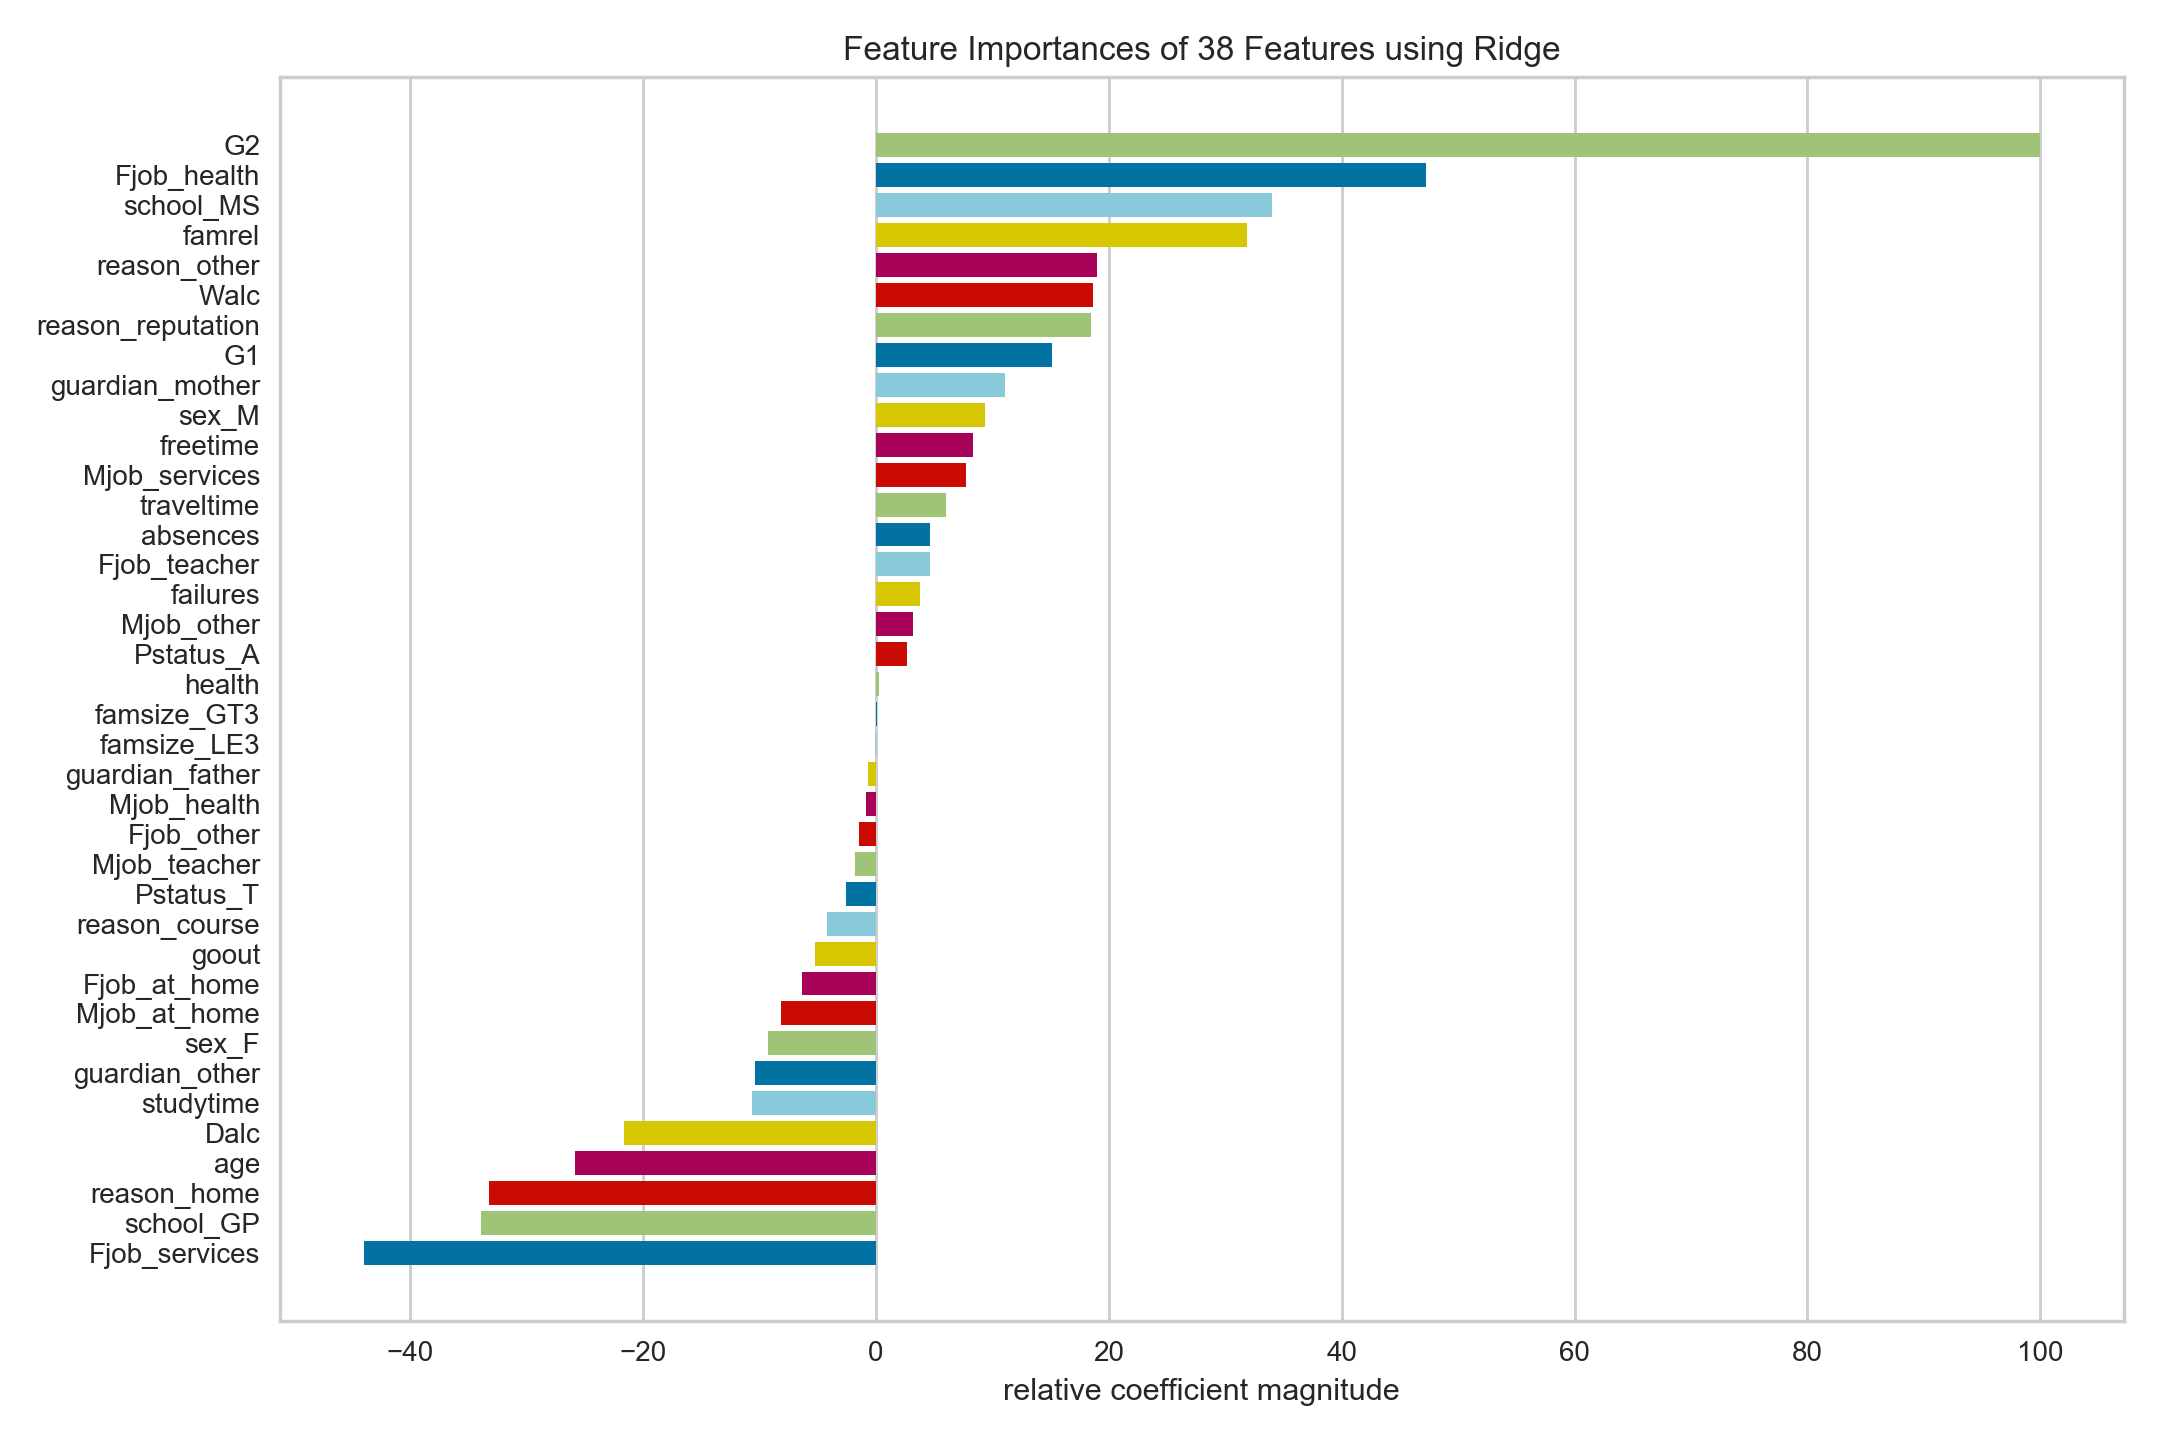

In [32]:
model = Ridge(random_state=0)
labels = ['age', 'absences', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'traveltime', 'studytime', 'failures', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other','G1', 'G2']
viz = FeatureImportances(model, labels=labels, size=(1080, 720))

viz.fit(X_train, y_train)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.show()

<IPython.core.display.Javascript object>


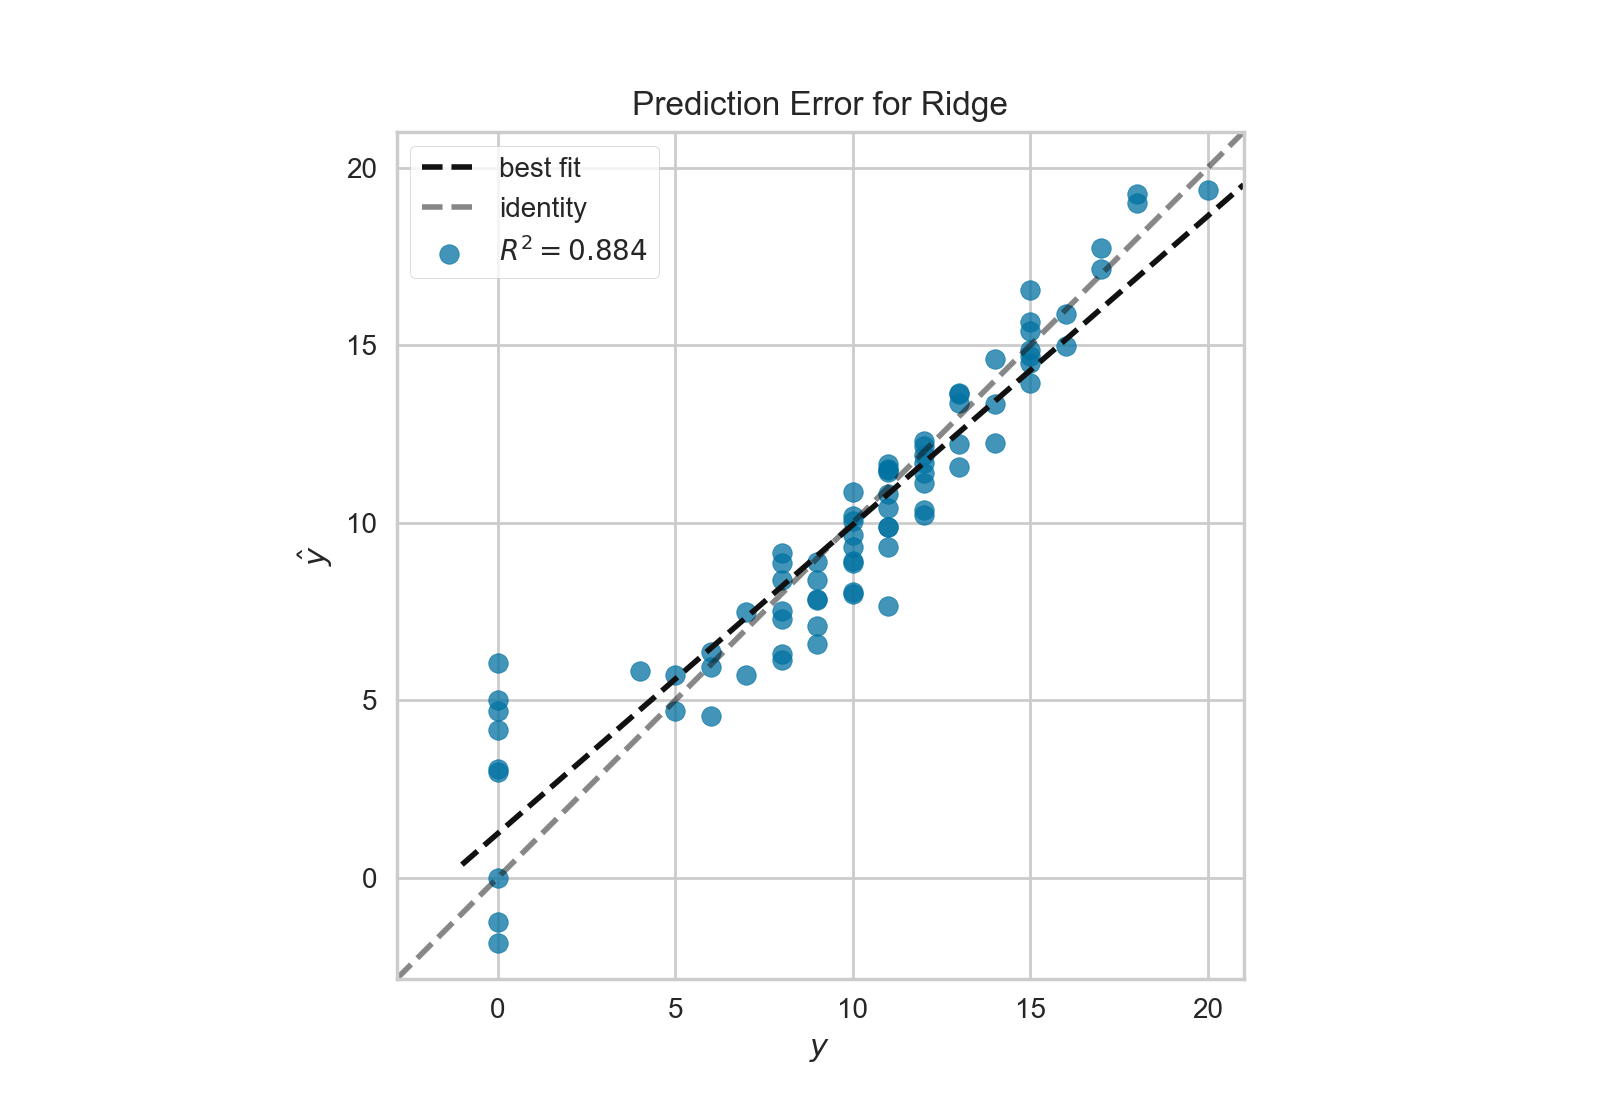

In [31]:
visualizier = PredictionError(Ridge())
visualizier.fit(X_train, y_train)
visualizier.score(X_test,y_test)
visualizier.poof()

# Random Forest

In [19]:
#using CV
regressor = RandomForestRegressor(n_estimators=100, random_state=None, min_samples_split=100)
regressor = regressor.fit(X, y) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor,X = X, y = y, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)
print(rmse_scores)

[1.41326121 2.01747558 1.62364629 2.96779173 2.22308603 1.48208284
 2.64195957 2.38562412 2.94104756 1.90599134]


In [27]:
pred_test= regressor.predict(X)
print(np.sqrt(mean_squared_error(y,pred_test))) 
print(r2_score(y, pred_test))

2.0078777520872415
0.8074378583359767


# SVM

In [20]:
regressor = SVR(kernel = 'poly')
regressor = regressor.fit(X, y)

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X, y=y, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)
print(rmse_scores)

[ 1.68558958  6.44298552  2.05516157  2.94833845  2.74307285  2.86878741
 17.73634816  6.20347411  2.59472786  2.51327651]


In [29]:
pred_test= regressor.predict(X)
print(np.sqrt(mean_squared_error(y,pred_test))) 
print(r2_score(y, pred_test))

0.8182763540965319
0.9680186807177524
